In [1]:
# IBM HR Analytics Employee Attrition & Performance
# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

print("="*60)
print("IBM HR ANALYTICS - EMPLOYEE ATTRITION ANALYSIS")
print("="*60)

IBM HR ANALYTICS - EMPLOYEE ATTRITION ANALYSIS


In [2]:
# 2. LOAD REAL DATASET
print("\nLoading dataset...")
df = pd.read_csv("C:\\Users\\GNANASEKARAN\\OneDrive\\Documents\\Python Project\\WA_Fn-UseC_-HR-Employee-Attrition.csv")
print("Dataset loaded successfully!")


Loading dataset...
Dataset loaded successfully!


In [3]:
print(f"Shape: {df.shape}")

Shape: (1470, 35)


In [4]:
# 3. DATA EXPLORATION
print("\n" + "="*60)
print("DATA EXPLORATION")
print("="*60)

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nFirst 5 rows:")
print(df.head())


DATA EXPLORATION

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int

In [5]:
# 4. DATA PREPARATION
print("\n" + "="*60)
print("DATA PREPARATION")
print("="*60)

df_clean = df.copy()

education_map = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}

rating_map = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

worklife_map = {
    1: 'Bad',
    2: 'Good',
    3: 'Better',
    4: 'Best'
}

df_clean['EducationLabel'] = df_clean['Education'].map(education_map)
df_clean['EnvironmentSatisfactionLabel'] = df_clean['EnvironmentSatisfaction'].map(rating_map)
df_clean['JobSatisfactionLabel'] = df_clean['JobSatisfaction'].map(rating_map)
df_clean['JobInvolvementLabel'] = df_clean['JobInvolvement'].map(rating_map)
df_clean['WorkLifeBalanceLabel'] = df_clean['WorkLifeBalance'].map(worklife_map)

print("Data preparation completed.")


DATA PREPARATION
Data preparation completed.



EXPLORATORY DATA ANALYSIS


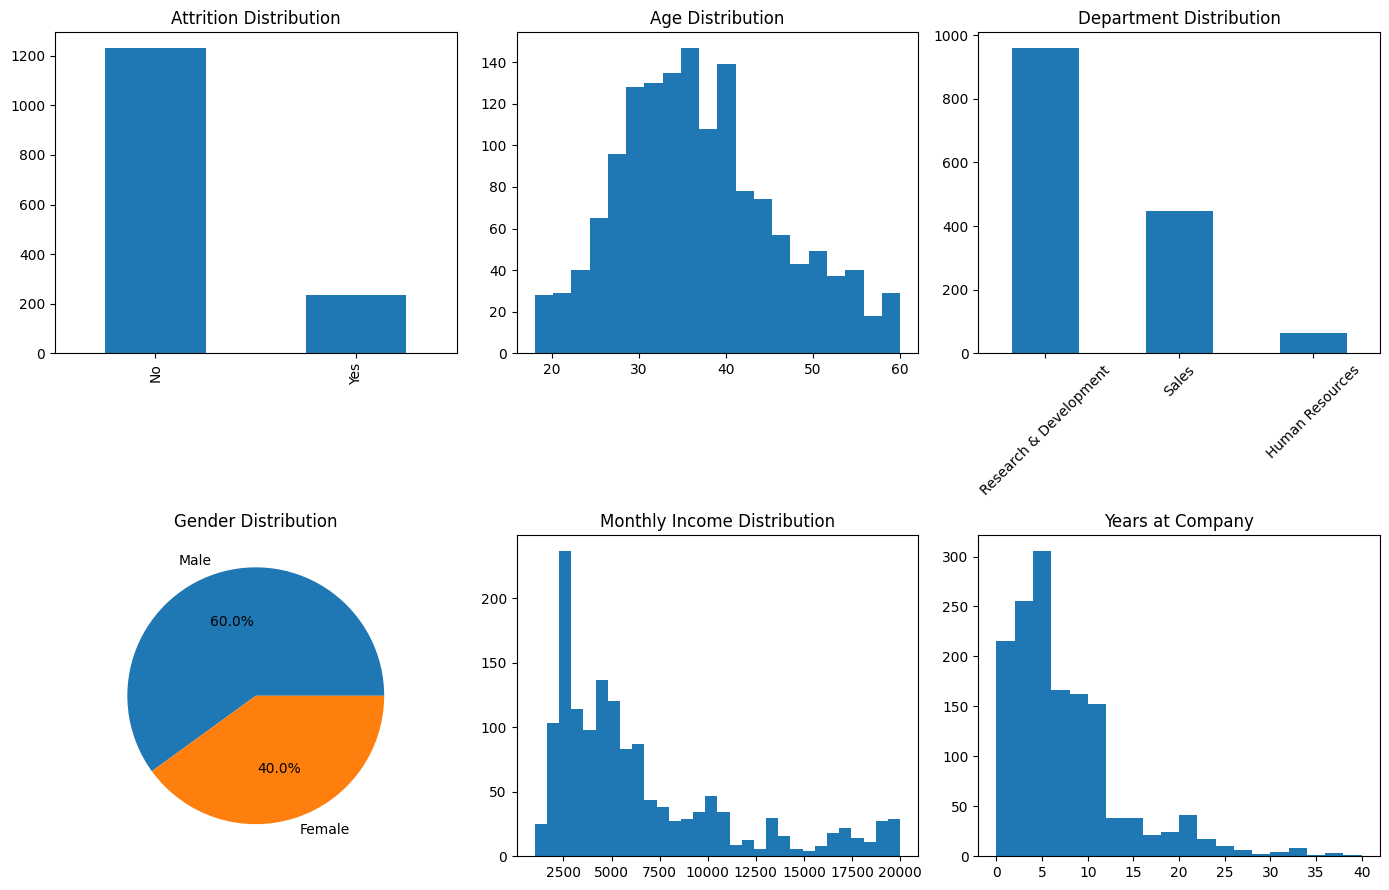


Overall Attrition Rate: 16.12%


In [6]:
# 5. EXPLORATORY DATA ANALYSIS
print("\n" + "="*60)
print("EXPLORATORY DATA ANALYSIS")
print("="*60)

plt.figure(figsize=(14, 9))

# Attrition Distribution
attrition_rate = (df_clean['Attrition'] == 'Yes').mean() * 100

plt.subplot(2, 3, 1)
df_clean['Attrition'].value_counts().plot(kind='bar')
plt.title("Attrition Distribution")

# Age Distribution
plt.subplot(2, 3, 2)
plt.hist(df_clean['Age'], bins=20)
plt.title("Age Distribution")

# Department
plt.subplot(2, 3, 3)
df_clean['Department'].value_counts().plot(kind='bar')
plt.title("Department Distribution")
plt.xticks(rotation=45)

# Gender
plt.subplot(2, 3, 4)
df_clean['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.ylabel("")

# Monthly Income
plt.subplot(2, 3, 5)
plt.hist(df_clean['MonthlyIncome'], bins=30)
plt.title("Monthly Income Distribution")

# Years at Company
plt.subplot(2, 3, 6)
plt.hist(df_clean['YearsAtCompany'], bins=20)
plt.title("Years at Company")

plt.tight_layout()
plt.show()

print(f"\nOverall Attrition Rate: {attrition_rate:.2f}%")

In [7]:
# 6. ATTRITION ANALYSIS
print("\nAttrition by Department:")
print(df_clean.groupby('Department')['Attrition'].apply(lambda x: (x == 'Yes').mean()*100))

print("\nAttrition by Gender:")
print(df_clean.groupby('Gender')['Attrition'].apply(lambda x: (x == 'Yes').mean()*100))

print("\nAttrition by Overtime:")
print(df_clean.groupby('OverTime')['Attrition'].apply(lambda x: (x == 'Yes').mean()*100))



Attrition by Department:
Department
Human Resources           19.047619
Research & Development    13.839750
Sales                     20.627803
Name: Attrition, dtype: float64

Attrition by Gender:
Gender
Female    14.795918
Male      17.006803
Name: Attrition, dtype: float64

Attrition by Overtime:
OverTime
No     10.436433
Yes    30.528846
Name: Attrition, dtype: float64



SALARY ANALYSIS


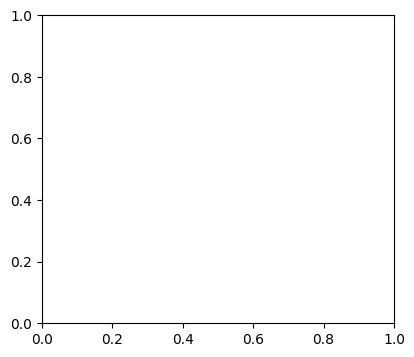

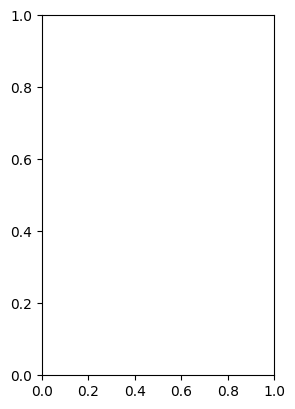

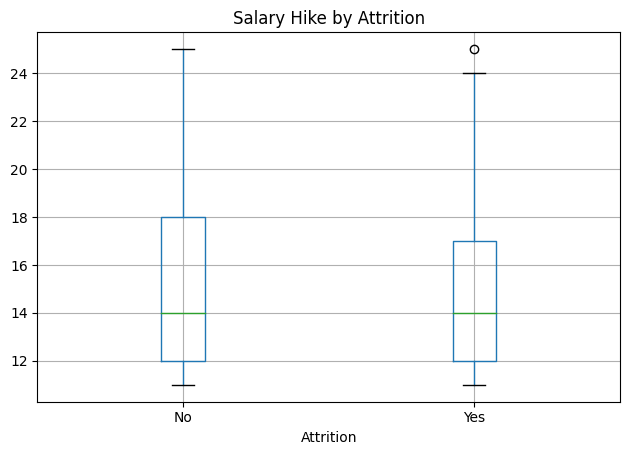

In [8]:
# 7. SALARY ANALYSIS
print("\n" + "="*60)
print("SALARY ANALYSIS")
print("="*60)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
df_clean.boxplot(column='MonthlyIncome', by='Attrition')
plt.title("Monthly Income by Attrition")
plt.suptitle("")

plt.subplot(1,2,2)
df_clean.boxplot(column='PercentSalaryHike', by='Attrition')
plt.title("Salary Hike by Attrition")
plt.suptitle("")

plt.tight_layout()
plt.show()

In [9]:
# 8. SATISFACTION ANALYSIS
print("\n" + "="*60)
print("SATISFACTION ANALYSIS")
print("="*60)

metrics = ['JobSatisfaction', 'EnvironmentSatisfaction', 'WorkLifeBalance', 'JobInvolvement']

for m in metrics:
    print(f"\n{m}:")
    print(df_clean.groupby('Attrition')[m].mean())


SATISFACTION ANALYSIS

JobSatisfaction:
Attrition
No     2.778589
Yes    2.468354
Name: JobSatisfaction, dtype: float64

EnvironmentSatisfaction:
Attrition
No     2.771290
Yes    2.464135
Name: EnvironmentSatisfaction, dtype: float64

WorkLifeBalance:
Attrition
No     2.781022
Yes    2.658228
Name: WorkLifeBalance, dtype: float64

JobInvolvement:
Attrition
No     2.770479
Yes    2.518987
Name: JobInvolvement, dtype: float64


In [10]:
# 9. TENURE ANALYSIS
print("\n" + "="*60)
print("TENURE ANALYSIS")
print("="*60)

print(df_clean.groupby('Attrition')[['YearsAtCompany', 'TotalWorkingYears']].mean())


TENURE ANALYSIS
           YearsAtCompany  TotalWorkingYears
Attrition                                   
No               7.369019          11.862936
Yes              5.130802           8.244726


In [11]:
# 10. CORRELATION ANALYSIS
print("\n" + "="*60)
print("CORRELATION ANALYSIS")
print("="*60)

df_clean['AttritionBinary'] = df_clean['Attrition'].map({'Yes': 1, 'No': 0})

corr = df_clean.select_dtypes(include=np.number).corr()['AttritionBinary'].abs()
top_corr = corr.sort_values(ascending=False)[1:6]

print("\nTop Factors Influencing Attrition:")
print(top_corr)


CORRELATION ANALYSIS

Top Factors Influencing Attrition:
TotalWorkingYears     0.171063
JobLevel              0.169105
YearsInCurrentRole    0.160545
MonthlyIncome         0.159840
Age                   0.159205
Name: AttritionBinary, dtype: float64


In [12]:
# 11. KEY INSIGHTS & RECOMMENDATIONS
print("\n" + "="*60)
print("KEY INSIGHTS")
print("="*60)

print("""
1. Overall attrition rate is around 16%.
2. Employees working overtime show significantly higher attrition.
3. Lower job satisfaction and work-life balance strongly correlate with attrition.
4. Employees with shorter tenure are more likely to leave.
5. Monthly income is negatively correlated with attrition.
""")

print("\nRECOMMENDATIONS:")
print("""
• Reduce excessive overtime
• Improve employee engagement & satisfaction
• Review compensation structure
• Focus retention efforts on early-tenure employees
• Introduce clear career growth paths
""")

print("\n✅ ANALYSIS COMPLETED SUCCESSFULLY")
print("="*60)


KEY INSIGHTS

1. Overall attrition rate is around 16%.
2. Employees working overtime show significantly higher attrition.
3. Lower job satisfaction and work-life balance strongly correlate with attrition.
4. Employees with shorter tenure are more likely to leave.
5. Monthly income is negatively correlated with attrition.


RECOMMENDATIONS:

• Reduce excessive overtime
• Improve employee engagement & satisfaction
• Review compensation structure
• Focus retention efforts on early-tenure employees
• Introduce clear career growth paths


✅ ANALYSIS COMPLETED SUCCESSFULLY
